In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("audio-classification", model="ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")

In [2]:
train_path = '/scratch/network/mk8574/audio_sentiment_challenge/data/train'
test_path = '/scratch/network/mk8574/audio_sentiment_challenge/data/test'

In [3]:
transform = {'angry': 0, 'fearful': 1, 'sad': 2, 'disgust': 3, 'neutral': 4, 'happy': 5, 'surprised': -10, 'calm': 4}

# emotions = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# 0: angry
# 1: fear
# 2: sad
# 3: disgust
# 4: neutral
# 5: happy

In [4]:
from glob import glob
import os
from tqdm import tqdm

# def get_argmax(PATH):
#     res = pipe(PATH)
    
#     index = 0
#     while transform[res[index]['label']] < 0:
#         index += 1

#     return transform[res[index]['label']]


# df = []

# for PATH in tqdm(glob(os.path.join(test_path, '*.wav'))):
#     label = get_argmax(PATH)
    
#     name = os.path.splitext(os.path.basename(PATH))[0]
    
#     df.append([name, label])
    
# print(df)

In [5]:
import csv

# df.insert(0, ['id', 'label'])

# with open('/scratch/network/mk8574/audio_sentiment_challenge/baseline_mk/submission.csv', mode = 'w', newline = '') as file:
#     writer = csv.writer(file)
#     writer.writerows(df)

100%|██████████| 5001/5001 [00:45<00:00, 109.92it/s]


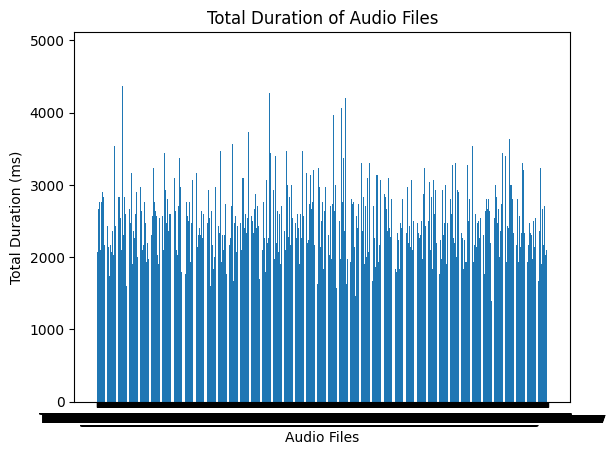

In [11]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt

def get_audio_lengths(audio_file):
    audio = AudioSegment.from_file(audio_file)
    lengths = [len(segment) for segment in audio]
    return lengths

def plot_audio_lengths_in_folder(folder_path):
    filenames = []
    lengths_list = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".mp3") or filename.endswith(".wav"):  # Adjust file extensions as needed
            audio_file_path = os.path.join(folder_path, filename)
            lengths = get_audio_lengths(audio_file_path)
            total_length = sum(lengths)
            
            filenames.append(filename)
            lengths_list.append(total_length)

    plt.bar(filenames, lengths_list)
    plt.xlabel('Audio Files')
    plt.ylabel('Total Duration (ms)')
    plt.title('Total Duration of Audio Files')
    plt.show()

if __name__ == "__main__":
    audio_folder_path = "/scratch/network/mk8574/audio_sentiment_challenge/data/train"  # Replace with the path to your audio folder
    plot_audio_lengths_in_folder(audio_folder_path)


In [17]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt

def get_audio_lengths(audio_file):
    audio = AudioSegment.from_file(audio_file)
    lengths = [len(segment) for segment in audio]
    sampling_rate = audio.frame_rate
    return lengths, sampling_rate

folder_path = "/scratch/network/mk8574/audio_sentiment_challenge/data/train"  # Replace with the path to your audio folder

lengths_list = []
sampling_list = []

for filename in tqdm(os.listdir(folder_path)):
    if filename.endswith(".mp3") or filename.endswith(".wav"):  # Adjust file extensions as needed
        audio_file_path = os.path.join(folder_path, filename)
        lengths, sampling_rate = get_audio_lengths(audio_file_path)
        total_length = sum(lengths)

        lengths_list.append(total_length)    
        sampling_list.append(sampling_rate)

100%|██████████| 5001/5001 [00:45<00:00, 108.94it/s]


(array([6.78405455e-06, 5.25764228e-05, 8.64966956e-05, 2.57794073e-04,
        3.12066510e-04, 5.85124705e-04, 5.41028351e-04, 8.25958642e-04,
        7.86950328e-04, 1.01591217e-03, 6.73317415e-04, 8.19174587e-04,
        5.03716051e-04, 5.98692814e-04, 4.44355573e-04, 2.40833937e-04,
        1.78081432e-04, 1.35681091e-04, 1.22112982e-04, 6.78405455e-05,
        8.31046683e-05, 3.39202728e-05, 3.73123001e-05, 1.69601364e-05,
        2.20481773e-05, 1.01760818e-05, 8.48006819e-06, 1.69601364e-06,
        0.00000000e+00, 1.35681091e-05]),
 array([1335. , 1452.9, 1570.8, 1688.7, 1806.6, 1924.5, 2042.4, 2160.3,
        2278.2, 2396.1, 2514. , 2631.9, 2749.8, 2867.7, 2985.6, 3103.5,
        3221.4, 3339.3, 3457.2, 3575.1, 3693. , 3810.9, 3928.8, 4046.7,
        4164.6, 4282.5, 4400.4, 4518.3, 4636.2, 4754.1, 4872. ]),
 <BarContainer object of 30 artists>)

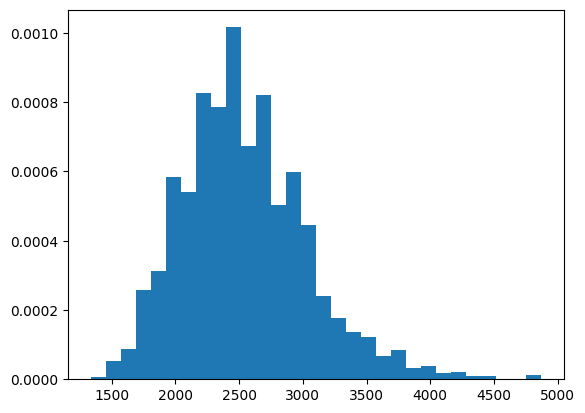

In [15]:
plt.hist(lengths_list, density = True, bins = 30)

In [38]:
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_mfcc(wave_file):
    # Load the audio file
    y, sr = sf.read(wave_file)

    # Compute the MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    print(type(mfccs))
    
    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.show()


<class 'numpy.ndarray'>


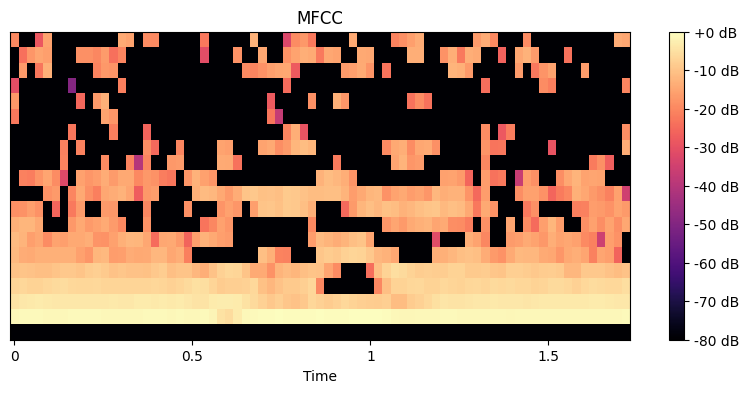

<class 'numpy.ndarray'>


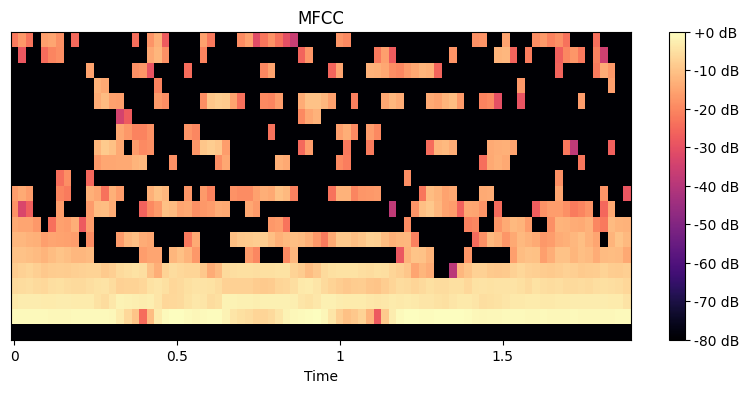

<class 'numpy.ndarray'>


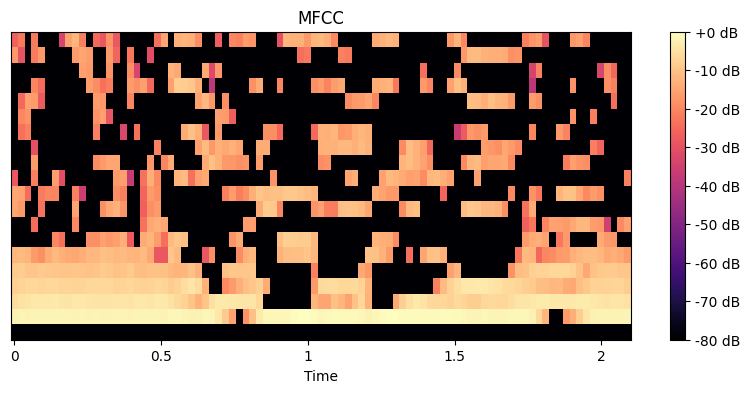

<class 'numpy.ndarray'>


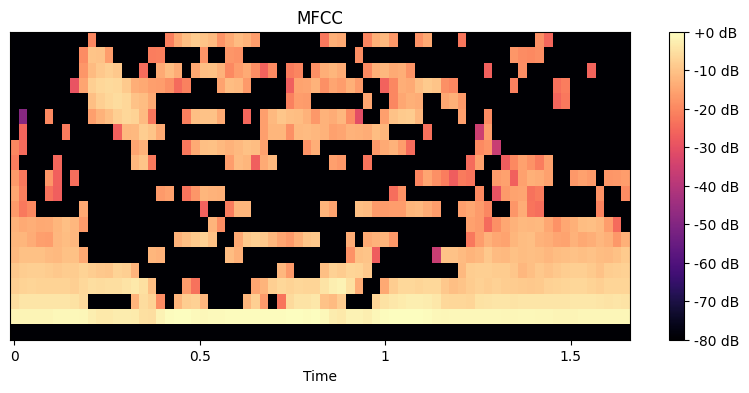

<class 'numpy.ndarray'>


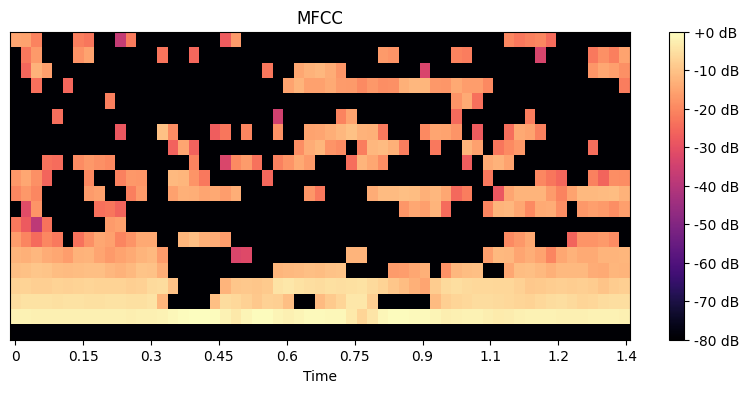

In [39]:
cnt = 5
train_dir = '/scratch/network/mk8574/audio_sentiment_challenge/data/train'
for PATH in os.listdir(train_dir):
    cnt -= 1
    if cnt >= 0:
        plot_mfcc(os.path.join(train_dir, PATH))